In [3]:
# !pip install statsmodels==0.13.5
!pip install openpyxl
!pip install statsmodels

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import mode

import statsmodels.formula.api as smf

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import plot_tree
from scipy.spatial import distance

from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 38.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 139.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 45.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Preprocesado de Datos

In [4]:
df = pd.read_excel('/work/Data_Apriori_Normalizada_Dias.xlsx', index_col= 'Unnamed: 0')
df.drop(['marca_exito', 'marca_exito2', 'marca_exito4'], axis =1, inplace = True)

########### Rename ###########
df.rename(columns = {'porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias': 'porcentaje_de_clics_impresiones_de_2_dias'}, inplace = True)
df.columns

Index(['cant_recomendaciones', 'densidad_publicitaria', 'dia_semana',
       'duracion_video_minutos', 'consecutivo_tema', 'densidad_recomendacion',
       'porcentaje_de_clics_impresiones_de_2_dias', 'vistas_2_dias',
       'porc_visualizacion_2d', 'likes_de_2_dias', 'dislikes_de_2_dias',
       'marca_exito3'],
      dtype='object')

In [3]:
# df[df.marca_exito3 == 1].drop('marca_exito3', axis =1).to_csv('marca_videos_exitosos.txt', index = False)
# df[df.marca_exito3 == 0].drop('marca_exito3', axis =1).to_csv('marca_videos_no_exitosos.txt', index = False)

In [4]:
# datos sintéticos

# marca_exist = pd.read_csv('')
# marca_exist['marca_exito'] = 1

# marca_no_exist = pd.read_csv('')
# marca_exist['marca_exito'] = 0

# # concatenando

# df = pd.concat([marca_exist, marca_exist])
# df

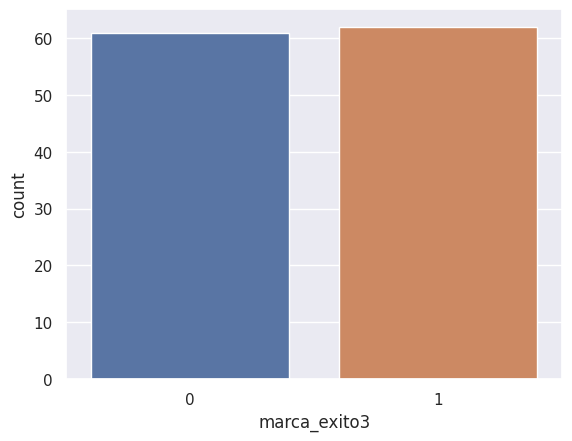

In [5]:
sns.countplot(x= 'marca_exito3', data =df);

In [6]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(123, 12)
(123, 12)


In [7]:
#le = LabelEncoder()
#df['rangos_duracion_video'] = le.fit_transform(df["rangos_duracion_video"])
#df['rangos_cant_publicidad'] = le.fit_transform(df["rangos_cant_publicidad"])

In [8]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df.select_dtypes('number'))
data_scaled = pd.DataFrame(data_scaled, columns= df.select_dtypes('number').columns)

In [9]:
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [10]:
df.select_dtypes('number').shape

(123, 12)

In [11]:
data_scaled.var().sort_values(ascending = False).describe()

count    12.000000
mean      0.064376
std       0.062085
min       0.027251
25%       0.033313
50%       0.041439
75%       0.061004
max       0.252033
dtype: float64

In [12]:
data_good = variance_threshold_selector(data_scaled,0.02)
print(data_good.shape)
data_good.columns

(123, 12)


Index(['cant_recomendaciones', 'densidad_publicitaria', 'dia_semana',
       'duracion_video_minutos', 'consecutivo_tema', 'densidad_recomendacion',
       'porcentaje_de_clics_impresiones_de_2_dias', 'vistas_2_dias',
       'porc_visualizacion_2d', 'likes_de_2_dias', 'dislikes_de_2_dias',
       'marca_exito3'],
      dtype='object')

In [13]:
variables = df.select_dtypes('number')
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif = pd.DataFrame({"Coeficiente": df.columns, "VIF": np.around(vif,2)})
vif

,Coeficiente,VIF
0,cant_recomendaciones,35.25
1,densidad_publicitaria,6.10
2,dia_semana,3.21
3,duracion_video_minutos,7.62
4,consecutivo_tema,6.72
5,densidad_recomendacion,8.42
6,porcentaje_de_clics_impresiones_de_2_dias,1.54
7,vistas_2_dias,10.49
8,porc_visualizacion_2d,19.00
9,likes_de_2_dias,8.48


In [14]:
df_poblam = pd.DataFrame()
df_poblam['% nulos'] = df.isna().sum()/len(df) * 100     
df_poblam['nulos'] = df.isna().sum()   
df_poblam['poblaron'] = 100 - df_poblam['% nulos']                                   
df_poblam.sort_values(by= '% nulos',ascending = False)

,% nulos,nulos,poblaron
cant_recomendaciones,0.0,0,100.0
densidad_publicitaria,0.0,0,100.0
dia_semana,0.0,0,100.0
duracion_video_minutos,0.0,0,100.0
consecutivo_tema,0.0,0,100.0
densidad_recomendacion,0.0,0,100.0
porcentaje_de_clics_impresiones_de_2_dias,0.0,0,100.0
vistas_2_dias,0.0,0,100.0
porc_visualizacion_2d,0.0,0,100.0
likes_de_2_dias,0.0,0,100.0


In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)

# Regression Logística

In [16]:
# # data_scaled = scaler.fit_transform(df.select_dtypes('number'))

# # data_scaled = pd.DataFrame(data_scaled, columns= df.select_dtypes('number').columns)

# log_reg = smf.logit("marca_exito ~ cant_recomendaciones + densidad_publicitaria + dia_semana +duracion_video_minutos + consecutivo_tema + densidad_recomendacion  + vistas_2_dias +porc_visualizacion_2d +  likes_de_2_dias + dislikes_de_2_dias",
#  data=df).fit()   #.fit_regularized(method='l1', alpha=1)
# log_reg.summary()get

In [5]:
# Datos para modelar:



X = df.drop(['marca_exito3','dia_semana' , 'consecutivo_tema', 'porcentaje_de_clics_impresiones_de_2_dias'], axis= 1)

y = df.marca_exito3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

(86, 8)
(37, 8)


In [18]:
# corr = X.corr()
# # Fill diagonal and upper half with NaNs
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# corr[mask] = np.nan
# Correlacion_bonita = (corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).highlight_null(null_color='#f1f1f1').set_precision(4)) ### 
# Correlacion_bonita

## Sklearn Logística

Testing accuracy train = 0.8604651162790697
Testing accuracy  test= 0.7837837837837838
[0.77777778 0.88235294 0.82352941 0.70588235 0.82352941]
Mediana 0.8235
Media 0.8026
Min 0.7059
Max 0.8824
-------------------------------------------------------------------------------------------------------------
Best estimador: {'solver': 'liblinear', 'penalty': 'l1', 'C': 2.6363636363636362}
Testing accuracy train = 0.9186046511627907
Testing accuracy  test= 0.8108108108108109
-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.80      0.75      0.77        16

    accuracy                           0.81        37
   macro avg       0.81      0.80      0.81        37
weighted avg       0.81      0.81      0.81        37



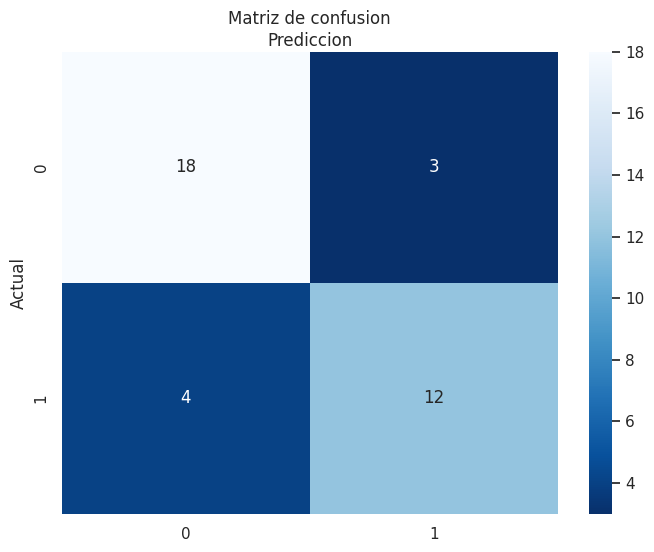

In [19]:
random_grid = {'penalty': ["l1","l2", "elasticnet", "none"],
            'C': np.linspace(0,3,100),
            "solver": ["liblinear", "sag", "saga"]}

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

Logist = LogisticRegression() 
Logist.fit(X_train, y_train)

y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

scores = cross_val_score(Logist, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)

print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')

print("-------------------------------------------------------------------------------------------------------------")


Logist = RandomizedSearchCV(estimator = Logist, param_distributions = random_grid,random_state=42, cv=cv)
Logist.fit(X_train, y_train)
print('Best estimador:', Logist.best_params_)

y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

cnf_matrix=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cnf_matrix,annot=True,cmap='Blues_r',fmt='g',)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Prediccion')
ax.set_ylabel('Actual')
ax.set_title('Matriz de confusion')

print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [20]:
new_video_data = {'cant_recomendaciones':4, 'densidad_publicitaria':0.24,
       'duracion_video_minutos':17, 'densidad_recomendacion':0.24,
       'vistas_2_dias':1298, 'porc_visualizacion_2d':0.24, 'likes_de_2_dias': 119, 'dislikes_de_2_dias':1} # marvel

new_vidio = list(new_video_data.values())

# new_vidio = [4, 0.3, 4, 10, 11,0.1, 0, 100, 0.20, 70, 5]

Logist.predict([new_vidio])

array([1])

## Stats Models Logística

In [21]:
#X_train_vol2 = X_train.drop('dia_semana', axis = 1)
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary()) # 0.7635

Optimization terminated successfully.
         Current function value: 0.164571
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           marca_exito3   No. Observations:                   86
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            7
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.7617
Time:                        21:56:14   Log-Likelihood:                -14.153
converged:                       True   LL-Null:                       -59.401
Covariance Type:            nonrobust   LLR p-value:                 9.785e-17
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
cant_recomendaciones       0.6603      0.896      0.737      0.461      -1.096     

# Arbol de decisión

Testing accuracy train = 1.0
Testing accuracy  test= 0.9459459459459459
[0.88888889 0.94117647 1.         0.82352941 0.76470588]
Mediana 0.8889
Media 0.8837
Min 0.7647
Max 1.0
-------------------------------------------------------------------------------------------------------------
Best estimador: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 11, 'criterion': 'gini'}
Testing accuracy train = 0.9767441860465116
Testing accuracy  test= 0.9459459459459459
-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.89      1.00      0.94        16

    accuracy                           0.95        37
   macro avg       0.94      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



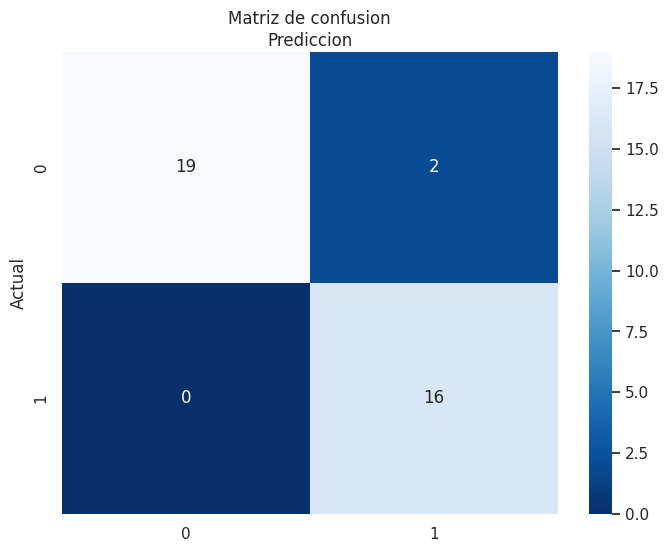

In [22]:
random_grid = { 'max_depth':[int(i) for i in range(1,25)],
"criterion" : ["gini", "entropy", "log_loss"],
"min_samples_split": [int(i) for i in range(1,10)],
"min_samples_leaf":  [int(i) for i in range(1,10)]
}

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

tree = DecisionTreeClassifier(random_state=42) 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

scores = cross_val_score(tree, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)

print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')

print("-------------------------------------------------------------------------------------------------------------")


tree = DecisionTreeClassifier(random_state=42) 

tree = RandomizedSearchCV(estimator = tree, param_distributions = random_grid,random_state=42, cv=cv)
tree.fit(X_train, y_train)
print('Best estimador:', tree.best_params_)

y_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

cnf_matrix=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cnf_matrix,annot=True,cmap='Blues_r',fmt='g',)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Prediccion')
ax.set_ylabel('Actual')
ax.set_title('Matriz de confusion')

print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [23]:
tree.predict([new_vidio])

array([0])

In [24]:
importancia =  tree.best_estimator_.feature_importances_*100
impvariables=pd.DataFrame()
impvariables['Variable']= X.columns
impvariables['Importancia'] = importancia
impvariables.sort_values('Importancia', ascending=False)

,Variable,Importancia
5,porc_visualizacion_2d,100.0
0,cant_recomendaciones,0.0
1,densidad_publicitaria,0.0
2,duracion_video_minutos,0.0
3,densidad_recomendacion,0.0
4,vistas_2_dias,0.0
6,likes_de_2_dias,0.0
7,dislikes_de_2_dias,0.0


# KNN

## KNN Sklearn

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

Testing accuracy train = 0.7790697674418605
Testing accuracy  test= 0.4594594594594595
[0.55555556 0.47058824 0.58823529 0.64705882 0.58823529]
Mediana 0.5882
Media 0.5699
Min 0.4706
Max 0.6471
-------------------------------------------------------------------------------------------------------------
Best estimador: {'weights': 'uniform', 'n_neighbors': 6, 'metric': <function cityblock at 0x7f666d034310>}
Testing accuracy train = 0.7558139534883721
Testing accuracy  test= 0.5405405405405406
-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        21
           1       0.47      0.50      0.48        16

    accuracy                           0.54        37
   macro avg       0.54      0.54      0.54        37
weighted avg       0.54      0.54      0.54        37



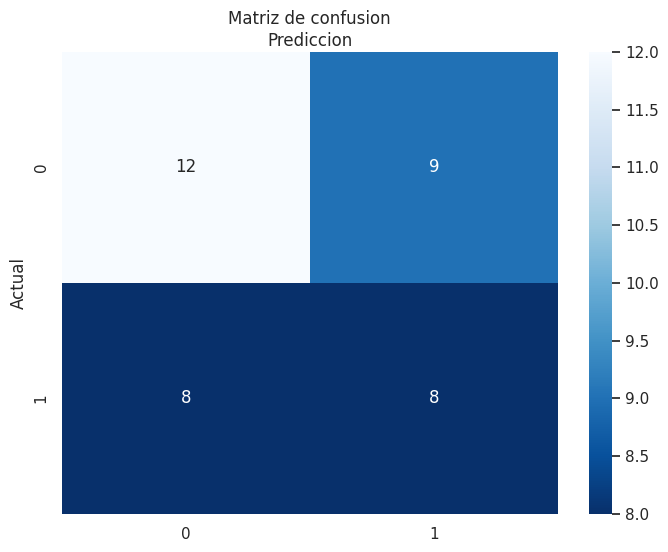

In [67]:
random_grid = {'n_neighbors':  [int(i) for i in range(1,30)],
'weights': ['uniform', 'distance'],
"metric": [distance.euclidean, distance.mahalanobis, distance.cityblock, 'minkowski']
            }

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
y_train_pred = neigh.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

scores = cross_val_score(neigh, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)

print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')

print("-------------------------------------------------------------------------------------------------------------")

neigh = KNeighborsClassifier() 

neigh = RandomizedSearchCV(estimator = neigh, param_distributions = random_grid,random_state=42, cv = cv)
neigh.fit(X_train, y_train)
print('Best estimador:', neigh.best_params_)

y_pred = neigh.predict(X_test)
y_train_pred = neigh.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

cnf_matrix=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cnf_matrix,annot=True,cmap='Blues_r',fmt='g',)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Prediccion')
ax.set_ylabel('Actual')
ax.set_title('Matriz de confusion')

print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [26]:
neigh.predict([new_vidio])

array([0])

## KNN Programado

In [27]:
dfX = X
dfY = y

In [28]:
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

In [29]:
#Function to calculate KNN
def predict(x_train, y, x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 

        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
        # print(dist)
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

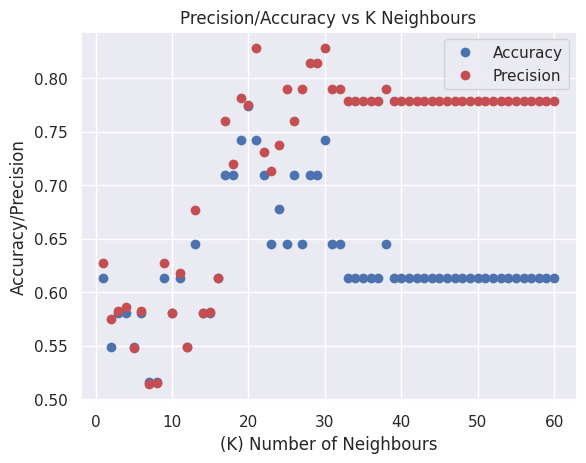

In [30]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, train_size=0.75)

kNeighbours = []
accuracies = []
precisions = []

for tries in range(60):
  y_pred = predict(np.array(X_train),np.array(y_train),np.array(X_test), (tries+1))
  kNeighbours.append(tries+1)
  accuracies.append(accuracy_score(y_test, y_pred))
  precisions.append(precision_score(y_test, y_pred, average='weighted'))

plt.plot(kNeighbours, accuracies, 'o', kNeighbours, precisions,'or')
plt.legend(['Accuracy', 'Precision'])
plt.title("Precision/Accuracy vs K Neighbours")
plt.xlabel('(K) Number of Neighbours')
plt.ylabel('Accuracy/Precision')
plt.show()

In [31]:
treshold = 0.5
diference_tolerance = 0.02

c = np.vstack((precisions, accuracies)).T

dictTest = dict(zip(kNeighbours, c))
optimalK = [1, sum(dictTest[1])]

print(len(dictTest), optimalK, dictTest)

for keys, vector in list(dictTest.items()):
    if vector[0] < treshold or vector[1] < treshold:
        del dictTest[keys]
        continue

    if abs(vector[0] - vector[1]) >= diference_tolerance:
        del dictTest[keys]
        continue
    
max_k = max(list(dictTest.items()), key=lambda x: sum(x[1]))[0]

print(len(dictTest), dictTest)
print(max_k)

60 [1, 1.2404692082111437] {1: array([0.62756598, 0.61290323]), 2: array([0.57503506, 0.5483871 ]), 3: array([0.58185484, 0.58064516]), 4: array([0.58643507, 0.58064516]), 5: array([0.54728426, 0.5483871 ]), 6: array([0.58185484, 0.58064516]), 7: array([0.51358234, 0.51612903]), 8: array([0.51518027, 0.51612903]), 9: array([0.62756598, 0.61290323]), 10: array([0.58010301, 0.58064516]), 11: array([0.61759531, 0.61290323]), 12: array([0.5483871, 0.5483871]), 13: array([0.67706872, 0.64516129]), 14: array([0.58010301, 0.58064516]), 15: array([0.58106961, 0.58064516]), 16: array([0.61290323, 0.61290323]), 17: array([0.75999299, 0.70967742]), 18: array([0.71960298, 0.70967742]), 19: array([0.78201369, 0.74193548]), 20: array([0.77487124, 0.77419355]), 21: array([0.82795699, 0.74193548]), 22: array([0.7311828 , 0.70967742]), 23: array([0.71290323, 0.64516129]), 24: array([0.73732719, 0.67741935]), 25: array([0.78972521, 0.64516129]), 26: array([0.75999299, 0.70967742]), 27: array([0.78972521

In [32]:
X_test.iloc[1]

cant_recomendaciones        3.000000
densidad_publicitaria       0.000000
duracion_video_minutos      4.433333
densidad_recomendacion      0.616000
vistas_2_dias             485.000000
porc_visualizacion_2d       0.355882
likes_de_2_dias            14.000000
dislikes_de_2_dias          0.000000
Name: 51, dtype: float64

In [33]:
inputs = X_test.iloc[1]
y_pred = predict(np.array(X_train),np.array(y_train), inputs, max_k)
y_pred

[0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 57 to 93
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cant_recomendaciones    92 non-null     int64  
 1   densidad_publicitaria   92 non-null     float64
 2   duracion_video_minutos  92 non-null     float64
 3   densidad_recomendacion  92 non-null     float64
 4   vistas_2_dias           92 non-null     int64  
 5   porc_visualizacion_2d   92 non-null     float64
 6   likes_de_2_dias         92 non-null     int64  
 7   dislikes_de_2_dias      92 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 6.5 KB


# Support Vector Machine (SVM)

Testing accuracy train = 0.6395348837209303
Testing accuracy  test= 0.4864864864864865
[ 0.0074911  -0.22189889 -0.15115398 -0.26750303 -0.14671948]
Mediana -0.1512
Media -0.156
Min -0.2675
Max 0.0075
-------------------------------------------------------------------------------------------------------------
Best estimador: {'kernel': 'linear', 'C': 1.085085085085085}
Testing accuracy train = 0.813953488372093
Testing accuracy  test= 0.6216216216216216
-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.53      1.00      0.70        16

    accuracy                           0.62        37
   macro avg       0.77      0.67      0.60        37
weighted avg       0.80      0.62      0.58        37



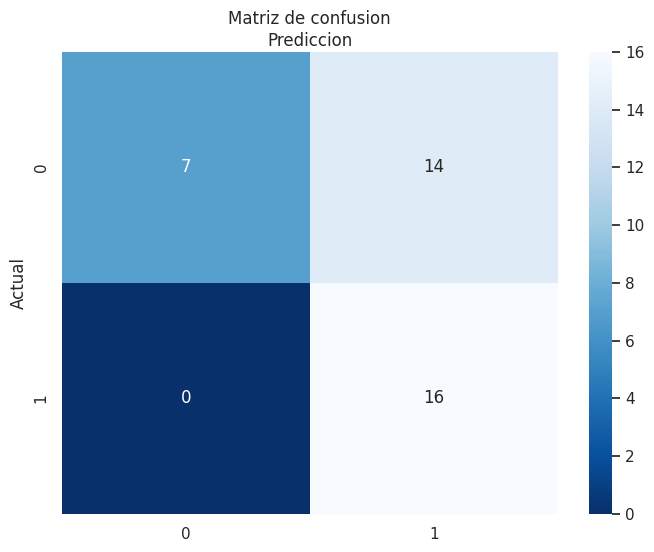

In [6]:
random_grid = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
 'C': np.linspace(0,2,1000)}

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

regressor = SVR() 
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred > 0.5))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred > 0.5))

scores = cross_val_score(regressor, X_train, y_train, cv=cv)
print(scores)

print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')

print("-------------------------------------------------------------------------------------------------------------")

regressor = SVR() 

regressor = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,random_state=42)
regressor.fit(X_train, y_train)
print('Best estimador:', regressor.best_params_)

y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred > 0.5))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred > 0.5))

cnf_matrix=confusion_matrix(y_test,y_pred > 0.5)
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cnf_matrix,annot=True,cmap='Blues_r',fmt='g',)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Prediccion')
ax.set_ylabel('Actual')
ax.set_title('Matriz de confusion')

print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [36]:
regressor.predict([new_vidio])

array([0.86141115])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7377d29e-ada8-4781-9a6b-60a54a1f06a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>